# SKA LOW Station Beam Response Simulator

The `ska-ost-sim-low-station-beam` Python package allows astronomers to simulate the station response for SKA LOW stations. This tool supports both full station and substation configurations. This notebook provides an overview of all the features provided by this package. The notebook is organized in the following way:

* Defining a station
    - Plotting the station layout
    - Query the coordinates of LFAA elements
    - Defining substations

## Defining a Low station

The `ska_ost_sim_low_station_beam.LowStation.LowStation` class allows you to configure an SKA LOW station. Currently, all LOW stations in the `AA1` array assembly are supported. 

In [1]:
from ska_ost_sim_low_station_beam.LowStation import LowStation
station = LowStation("S8-1")

### Plot the station layout

You can plot the locations of the LFAA in the specified station using `plot_station_layout()`.

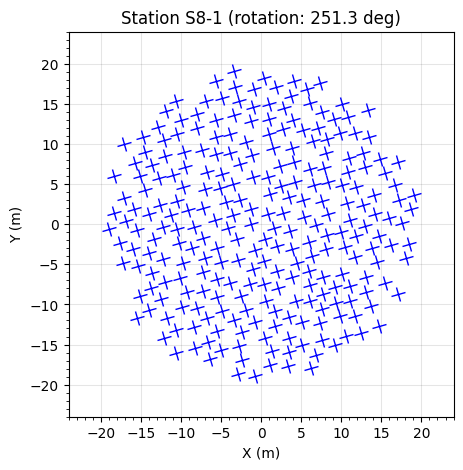

In [2]:
fig, axes = station.plot_station_layout()

You can plot the station boundary, cardinal direction, and principle directions by setting the appropriate flags as shown below.

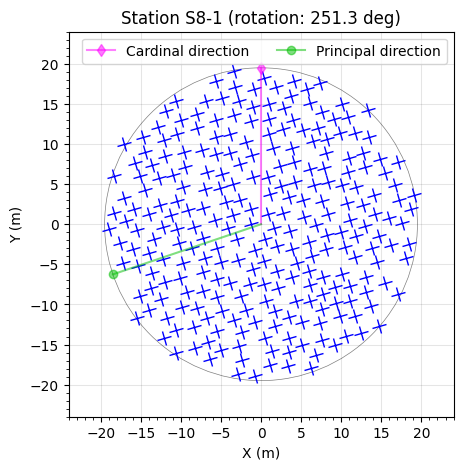

In [3]:
fig, axes = station.plot_station_layout(
    plot_station_boundary=True, 
    plot_principle_direction=True, 
    plot_cardinal_direction=True
)

The plot can be customized further. See the function help for more information. 

You can also specify a matplotlib axes to plot on.

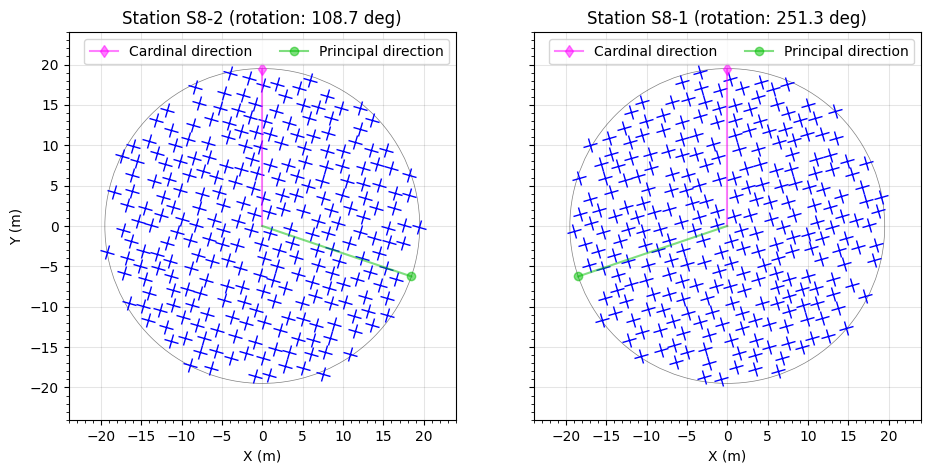

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(11, 6), sharey=True)
station = LowStation("S8-2")
station.plot_station_layout(
    axes=axes[0],
    plot_station_boundary=True, 
    plot_principle_direction=True, 
    plot_cardinal_direction=True
)
station = LowStation("S8-1")
station.plot_station_layout(
    axes=axes[1],
    plot_station_boundary=True, 
    plot_principle_direction=True, 
    plot_cardinal_direction=True
)
axes[1].set_ylabel("");

### Query the coordinates of LFAA elements

You can get the name of all the LFAA elements in the station using the function `get_lfaa_names()`.

In [5]:
",".join(station.get_lfaa_names())

'SB01-01,SB01-02,SB01-03,SB01-04,SB01-05,SB01-06,SB01-07,SB01-08,SB01-09,SB01-10,SB02-01,SB02-02,SB02-03,SB02-04,SB02-05,SB02-06,SB02-07,SB02-08,SB02-09,SB02-10,SB02-11,SB03-01,SB03-02,SB03-03,SB03-04,SB03-05,SB03-06,SB03-07,SB03-08,SB03-09,SB03-10,SB03-11,SB04-01,SB04-02,SB04-03,SB04-04,SB04-05,SB04-06,SB04-07,SB04-08,SB04-09,SB04-10,SB04-11,SB05-01,SB05-02,SB05-03,SB05-04,SB05-05,SB05-06,SB05-07,SB05-08,SB05-09,SB05-10,SB06-01,SB06-02,SB06-03,SB06-04,SB06-05,SB06-06,SB06-07,SB06-08,SB06-09,SB06-10,SB06-11,SB07-01,SB07-02,SB07-03,SB07-04,SB07-05,SB07-06,SB07-07,SB07-08,SB07-09,SB07-10,SB07-11,SB08-01,SB08-02,SB08-03,SB08-04,SB08-05,SB08-06,SB08-07,SB08-08,SB08-09,SB08-10,SB09-01,SB09-02,SB09-03,SB09-04,SB09-05,SB09-06,SB09-07,SB09-08,SB09-09,SB09-10,SB09-11,SB10-01,SB10-02,SB10-03,SB10-04,SB10-05,SB10-06,SB10-07,SB10-08,SB10-09,SB10-10,SB10-11,SB11-01,SB11-02,SB11-03,SB11-04,SB11-05,SB11-06,SB11-07,SB11-08,SB11-09,SB11-10,SB12-01,SB12-02,SB12-03,SB12-04,SB12-05,SB12-06,SB12-07,SB12-08

The function `get_lfaa_coordinates()` can be used to query the coordinates of the LFAA elements. Note that a `RuntimeError` is raised if the specified LFAA is not present in the LowStation object.

In [6]:
station.get_lfaa_coordinates(lfaa_names="SB01-01,SB01-02")

[<EarthLocation [(-2561216.6924, 5085891.1196, -2864164.6997)] m>,
 <EarthLocation [(-2561219.0474, 5085891.8249, -2864161.3638)] m>]

### Defining substations

The `LowStation` class can be used to define SKA Low substations as demonstrated below. The example below creates a substation with just two LFAA elements (SB01-01 and SB01-02) situated within the parent station S8-1. 

In [7]:
substation = LowStation(
    station_type="substation",
    station_name="sub_s8_1",
    parent_station="S8-1", 
    lfaa_list="SB01-01,SB01-02"
)

The input parameter can also accept unix-style patterns, which are internally resolved to valid LFAA names.

In [8]:
substation = LowStation(
    station_type="substation",
    station_name="sub_s8_1",
    parent_station="S8-1", 
    lfaa_list="SB01-01,SB01-*"
)

You can plot the station layout using `plot_station_layout()` described in the previous section.

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Station sub_s8_1 (rotation: 251.3 deg)'}, xlabel='X (m)', ylabel='Y (m)'>)

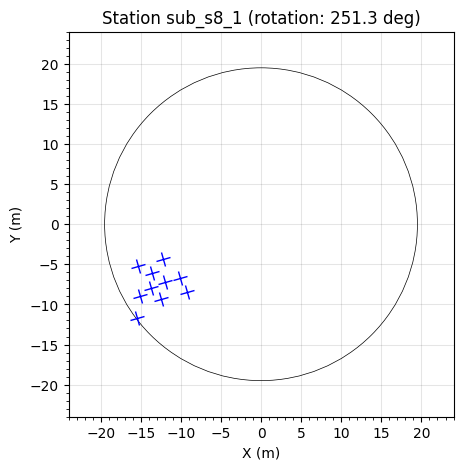

In [9]:
substation.plot_station_layout(plot_station_boundary=True, station_boundary_alpha=1)

Below is an example showing S8-1 station split into 24 substations (no scientific use assumed here; just an example to demonstrate the plotting functionality).

Text(0.5, 1.0, 'Station S8-1 split into 24 substations')

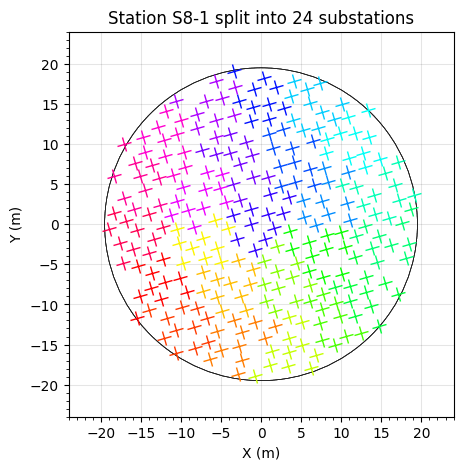

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
color = iter(cm.hsv(numpy.linspace(0, 1, 25)))
for i in range(1,25):
    substation = LowStation(
        station_type="substation",
        station_name=f"sub_s8_{i}",
        parent_station="S8-1", 
        lfaa_list=f"SB{i:02d}-*"
    )
    substation.plot_station_layout(
        axes,
        lfaa_marker_color=next(color),
        plot_station_boundary=True,
        station_boundary_alpha=0.1
    )
# Rewrite the plot title
axes.set_title("Station S8-1 split into 24 substations")